In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [6]:
df = pd.read_csv('Autism_Data.arff', na_values ='?',quotechar= "'")

In [7]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [5]:
df = df.rename(columns={'austim':'family member with PDD','jundice':'jaundice','contry_of_res':'country_of_res'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1_Score                704 non-null    int64  
 1   A2_Score                704 non-null    int64  
 2   A3_Score                704 non-null    int64  
 3   A4_Score                704 non-null    int64  
 4   A5_Score                704 non-null    int64  
 5   A6_Score                704 non-null    int64  
 6   A7_Score                704 non-null    int64  
 7   A8_Score                704 non-null    int64  
 8   A9_Score                704 non-null    int64  
 9   A10_Score               704 non-null    int64  
 10  age                     702 non-null    float64
 11  gender                  704 non-null    object 
 12  ethnicity               609 non-null    object 
 13  jaundice                704 non-null    object 
 14  family member with PDD  704 non-null    ob

In [7]:
#We drop used_app_before cause it is a useless attribute and it is not related to a patient medical or biological condition
df.drop('used_app_before',axis=1,inplace=True)

In [8]:
#Count nan values
df.isnull().sum()

A1_Score                   0
A2_Score                   0
A3_Score                   0
A4_Score                   0
A5_Score                   0
A6_Score                   0
A7_Score                   0
A8_Score                   0
A9_Score                   0
A10_Score                  0
age                        2
gender                     0
ethnicity                 95
jaundice                   0
family member with PDD     0
country_of_res             0
result                     0
age_desc                   0
relation                  95
Class/ASD                  0
dtype: int64

In [9]:
df.ethnicity.value_counts()

White-European     233
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [10]:
#we can modify also the one row with value of ethnicity = others to 'Others'
df[df['ethnicity']=='others'] 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,result,age_desc,relation,Class/ASD
657,1,1,0,0,1,0,1,0,1,0,36.0,m,others,no,no,United States,5,18 and more,Self,NO


In [11]:
df.loc[657,'ethnicity'] = 'Others'
df[df['ethnicity']=='others']

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,result,age_desc,relation,Class/ASD


In [12]:
#the Desc age value is useless so we can eliminate it
df.age_desc.value_counts()

18 and more    704
Name: age_desc, dtype: int64

In [13]:
df.drop('age_desc', axis=1, inplace=True)

In [14]:
#Need to drop also the relation column because it is not related to the patient caratheristics
df.drop('relation',axis=1,inplace=True)

In [15]:
#Need to drop the result column as it is the result of the sum o the precedent score
df.drop(axis =1, inplace= True,labels='result')

_Now we analyze the age which is a float value. We can see that there is an anomalous age which is 383 --> we need to drop that patient_

In [16]:
df.age.value_counts().sort_index()

17.0     18
18.0     31
19.0     35
20.0     46
21.0     49
22.0     37
23.0     37
24.0     34
25.0     27
26.0     28
27.0     31
28.0     24
29.0     27
30.0     30
31.0     21
32.0     18
33.0     16
34.0     12
35.0     17
36.0     13
37.0     17
38.0     12
39.0      7
40.0     16
41.0      3
42.0     15
43.0     11
44.0     10
45.0      4
46.0      6
47.0      8
48.0      4
49.0      3
50.0      5
51.0      1
52.0      5
53.0      6
54.0      2
55.0      6
56.0      2
58.0      2
59.0      1
60.0      1
61.0      2
64.0      1
383.0     1
Name: age, dtype: int64

In [17]:
df[df.age == 383.0]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,NO


In [18]:
df.drop(52,axis=0,inplace = True)

In [19]:
df['gender'].map({'m':1,'f':0})
df['gender'] = df['gender'].map({'m':1,'f':0})
df['jaundice'] = df['jaundice'].map({'yes':1,'no':0})
df['family member with PDD'] = df['family member with PDD'].map({'yes':1,'no':0})
df['Class/ASD'] = df['Class/ASD'].map({'YES':1,'NO':0})

## Handling of missing values

Ignoring the tuple with missing values to see if there is a change in class distribution

In [20]:
#Calculate the percentage of remained tuple 
df_notna = df.dropna(how='any')
len(df_notna)/len(df)

0.8648648648648649

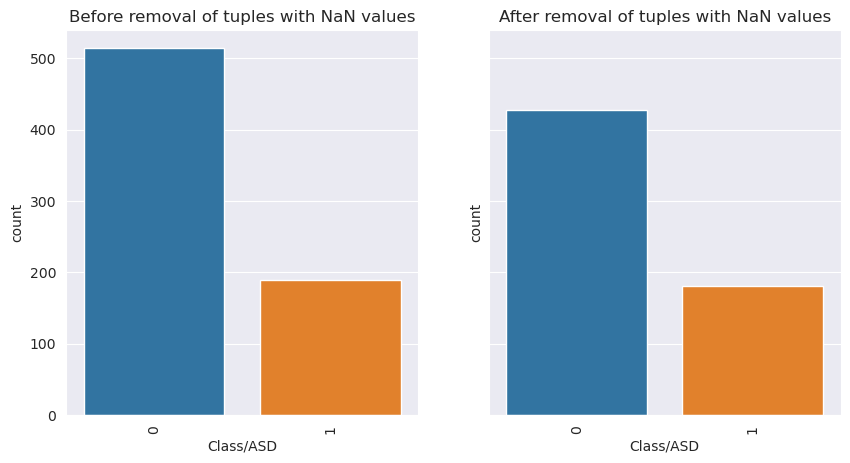

In [21]:
#Plot the count plot for the class in the original dataframe and in dataframe without missing values
fig,axes = plt.subplots(1,2,figsize=(10,5),sharey = True)
sns.countplot(x='Class/ASD',data = df, ax = axes[0], order = df_notna['Class/ASD'].value_counts().index)
axes[0].tick_params(axis = 'x',labelrotation=90)
axes[0].set_title('Before removal of tuples with NaN values')
sns.countplot(x='Class/ASD',data = df_notna, ax = axes[1], order = df_notna['Class/ASD'].value_counts().index)
axes[1].tick_params(axis = 'x',labelrotation=90)
axes[1].set_title('After removal of tuples with NaN values')

plt.show()

In [22]:
#Check for each attribute with missing values the number of rows that contain Nan values
rows_na =  df.isnull().any(axis=1)
print(df.loc[[i for i in rows_na.index if rows_na[i]]].ethnicity.value_counts(dropna= False))
print()
print(df.loc[[i for i in rows_na.index if rows_na[i]]].age.value_counts(dropna= False))


NaN    95
Name: ethnicity, dtype: int64

21.0    17
20.0    15
19.0    11
22.0     4
23.0     4
32.0     4
17.0     4
26.0     3
24.0     3
30.0     3
28.0     2
47.0     2
37.0     2
27.0     2
31.0     2
NaN      2
43.0     2
52.0     2
50.0     1
33.0     1
44.0     1
40.0     1
41.0     1
29.0     1
25.0     1
45.0     1
38.0     1
34.0     1
56.0     1
Name: age, dtype: int64


In [23]:
#Find the rows where age  is null
mask = df['age'].isnull()
df[mask]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family member with PDD,country_of_res,Class/ASD
62,0,0,0,0,0,0,0,0,0,0,NaN,1,NaN,0,0,Saudi Arabia,0
91,0,1,0,0,1,0,1,0,0,1,NaN,0,NaN,0,0,Jordan,0


In [24]:
#drop them
df.drop(62,axis=0,inplace = True)
df.drop(91,axis=0,inplace = True)

In [25]:
#fill the other missing values with Others
df.fillna(value = 'Others',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 703
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1_Score                701 non-null    int64  
 1   A2_Score                701 non-null    int64  
 2   A3_Score                701 non-null    int64  
 3   A4_Score                701 non-null    int64  
 4   A5_Score                701 non-null    int64  
 5   A6_Score                701 non-null    int64  
 6   A7_Score                701 non-null    int64  
 7   A8_Score                701 non-null    int64  
 8   A9_Score                701 non-null    int64  
 9   A10_Score               701 non-null    int64  
 10  age                     701 non-null    float64
 11  gender                  701 non-null    int64  
 12  ethnicity               701 non-null    object 
 13  jaundice                701 non-null    int64  
 14  family member with PDD  701 non-null    in

In [26]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'family member with PDD', 'country_of_res',
       'Class/ASD'],
      dtype='object')

In [27]:
for column in df.columns:
    if column in ["ethnicity","country_of_res"]:
        temp = pd.get_dummies(df[column],drop_first=False)
        df = pd.concat([df,temp],axis=1)
        df.drop(axis = 1, labels = column,inplace = True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Sri Lanka,Sweden,Tonga,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Viet Nam
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
700,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
701,1,0,1,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
702,1,0,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Change every nominal attribute type as category
df['age'] = df['age'].astype('float32')
for column in df.columns:
    if column not in df.columns[1:10] and not (column=='age') :
        df[column] = df[column].astype('category')

df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'family member with PDD', 'Class/ASD', 'Asian', 'Black',
       'Hispanic', 'Latino', 'Middle Eastern ', 'Others', 'Pasifika',
       'South Asian', 'Turkish', 'White-European', 'Afghanistan',
       'AmericanSamoa', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belgium', 'Bolivia',
       'Brazil', 'Burundi', 'Canada', 'Chile', 'China', 'Costa Rica', 'Cyprus',
       'Czech Republic', 'Ecuador', 'Egypt', 'Ethiopia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Lebanon',
       'Malaysia', 'Mexico', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Oman', 'Pakistan', 'Philippines', 'Portugal',
       'Romania', 'Russi

# Imbalanced class problems

In [29]:
df['Class/ASD'].value_counts()

0    512
1    189
Name: Class/ASD, dtype: int64

Class are not so imbalanced

# Comparing classifiers with features Selection

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from statistics import mean


In [31]:
def test_classifier(clf,X,y):
    estimators = [('fs',SelectKBest()),('clf',clf)]
    pipe_fs = Pipeline(estimators)

    estimators_nofs = [('clf',clf)]
    pipe_nofs = Pipeline(estimators_nofs)

    kf = KFold(n_splits=10)

    results_fs = cross_validate(pipe_fs,
                         X,
                         y,
                         scoring = {'fscore': make_scorer(f1_score),
                                    'accuracy': make_scorer(accuracy_score)},
                         return_estimator = True,
                         cv = kf,
                         n_jobs = -1)
    results_nofs = cross_validate(pipe_nofs,
                         X,
                         y,
                         scoring = {'fscore': make_scorer(f1_score),
                                    'accuracy': make_scorer(accuracy_score)},
                         return_estimator = True,
                         cv = kf,
                         n_jobs = -1)
    metrics = pd.DataFrame({'fsel': results_fs['test_fscore'],
                        'nofsel': results_nofs['test_fscore']})

    ax = metrics.boxplot(figsize = (3,3))
    ax.set_ylabel('f-score')
    plt.show()
    print("Mean feature selection:",mean(metrics['fsel']))
    print("Mean No feature selection",mean(metrics['nofsel']))
    print(ttest_rel(metrics['fsel'],metrics['nofsel']))


In [32]:
X = df.drop(axis=1,labels='Class/ASD')
y = df['Class/ASD']
print(X)
print()
print(y)


    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0          1         1         1         1         0         0         1   
1          1         1         0         1         0         0         0   
2          1         1         0         1         1         0         1   
3          1         1         0         1         0         0         1   
4          1         0         0         0         0         0         0   
..       ...       ...       ...       ...       ...       ...       ...   
699        0         1         0         1         1         0         1   
700        1         0         0         0         0         0         0   
701        1         0         1         1         1         0         1   
702        1         0         0         1         1         0         1   
703        1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ...  Sri Lanka Sweden Tonga Turkey  \
0           1

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

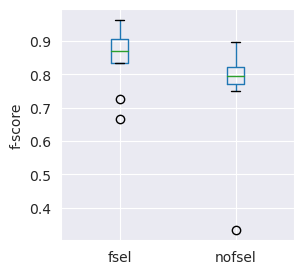

Mean feature selection: 0.8494738574988248
Mean No feature selection 0.7625546449104602
Ttest_relResult(statistic=2.4484292316668212, pvalue=0.03685155219184651)


In [34]:
decisionTree = DecisionTreeClassifier(criterion='gini')
test_classifier(decisionTree,X,y)

P-value is greater than 0.05, so we can assume that the differences in the f-score between the f-scores samples can be attributed to chance. For this reason we choose use the Decision tree without feature selection
attributed to chance

In another case p value is under 0.05
What can i assume?
Feature selection is always better than no feature selection and in some cases there is significant statistical difference. So it's better to make features selection for having better performance in terms of f1 score.

f-score for decision tree classifier is about 0.8552 with feature selection

# K-Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier

Need to select "k" based on the performance
Test the classifier multiple times in order to find an optimal k

Test for k= 5


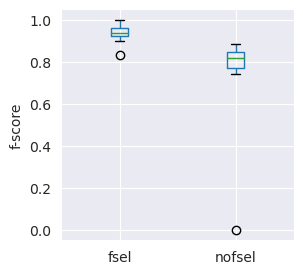

Mean feature selection: 0.9340009563627953
Mean No feature selection 0.7355551721042388
Ttest_relResult(statistic=2.1931169388858507, pvalue=0.05596515816138635)
Test for k= 6


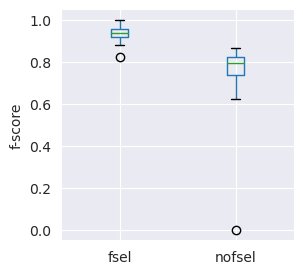

Mean feature selection: 0.9282162144863286
Mean No feature selection 0.7006043926753717
Ttest_relResult(statistic=2.537129299648508, pvalue=0.031860494897694366)
Test for k= 7


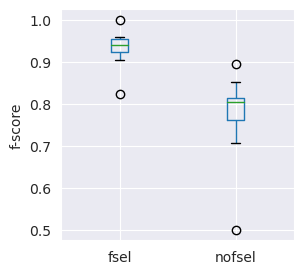

Mean feature selection: 0.931933944855687
Mean No feature selection 0.773592747407638
Ttest_relResult(statistic=3.8363229821302567, pvalue=0.003988914732859249)
Test for k= 8


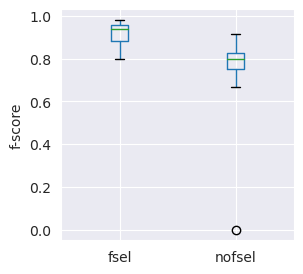

Mean feature selection: 0.915174483901366
Mean No feature selection 0.7153157187639947
Ttest_relResult(statistic=2.846497118372223, pvalue=0.01919857414948027)
Test for k= 9


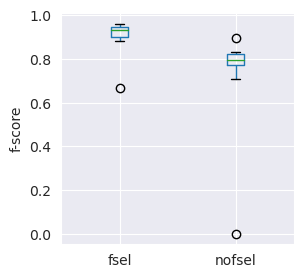

Mean feature selection: 0.9030492727072578
Mean No feature selection 0.7210413443348468
Ttest_relResult(statistic=3.259161337526671, pvalue=0.009851940463188628)
Test for k= 10


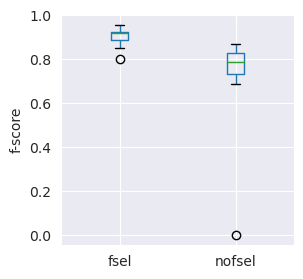

Mean feature selection: 0.9013860566366342
Mean No feature selection 0.7074337105120324
Ttest_relResult(statistic=2.748334584858803, pvalue=0.022538134070204174)


In [36]:
for k in range(5,11):  #range does not include 11 but include 10
    print("Test for k=",k)
    knn  = KNeighborsClassifier(n_neighbors=k)
    test_classifier(knn,X,y)

As i can see, for k = 10 we have the worst accuracy in terms of features selection but also a smaller p-value than other cases. Can i assume that is the most reliable result(less optimistic)?
We can see that the best result with a low p-value is that for k = 7 so i can choose that model done with feature selection. K = 7 represent a local maximum so we chose a k=7 k-nn classifier

K-NN classifier with k =7 performs a f-score that is about 0.93 with features selection.

# Naive Bayesian classifier

In [37]:
from sklearn.naive_bayes import BernoulliNB
bc = BernoulliNB(alpha=0)  # no smoothing

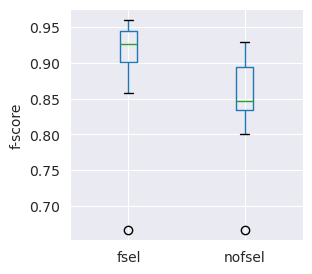

Mean feature selection: 0.8970921534605745
Mean No feature selection 0.8442160696849709
Ttest_relResult(statistic=2.6819372227938185, pvalue=0.025126197578227646)


In [38]:
test_classifier(bc,X,y)

NB with features selection perform a f-score that is about 0.89 and the difference between the f-score without features selection is statistically significant

# ENSEMBLE METHOD

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(bootstrap=True) # uses bootstrap sample

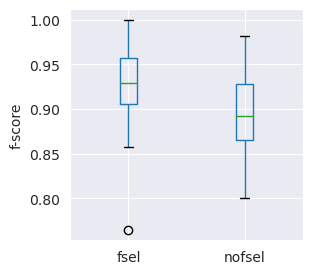

Mean feature selection: 0.9174716546866327
Mean No feature selection 0.8952932335823964
Ttest_relResult(statistic=1.4161580604682853, pvalue=0.19039451251781214)


In [41]:
test_classifier(rf,X,y)


As we can see p-value is very high so we cannot assume that there is statistical significance in the difference of f-score values. So we cannot say that features selection really improve the result of the classification of Random Forest Classifier.
Otherwise this classifier performs very well also without features selection, showing an f-score that si about 0.90

# ADABOOST

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ab = AdaBoostClassifier()  #n_estimatore=50 default Decision tree classifier as base estimator

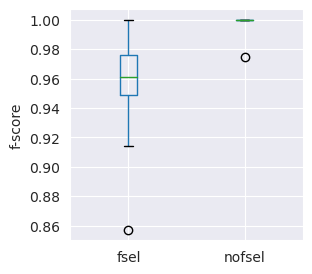

Mean feature selection: 0.9544320085777387
Mean No feature selection 0.9974358974358974
Ttest_relResult(statistic=-2.9416263253147776, pvalue=0.016443205010309957)


In [44]:
test_classifier(ab,X,y)

Adaboost is the most accurate classifier in terms of accuracy and coverage of tuple. 2*(f-score)  = (acc*recall)/(acc+recall)

In [ ]:
ab_nbc = AdaBoostClassifier(base_estimator=bc)  #n_estimatore=50 default, Naive Bayesian Classifier as base estimator
test_classifier(ab_nbc)